# Analyst Information

**Introduction to Machine Learning and Analysis (Statistics)**

**Analyst** = ```Kofi Anane Poku```

**Linkedin Profile** : ```linkedin.com/in/kofi-poku-anane```



**TABLE OF CONTENT**

Link to Download Dataset

Link : https://drive.google.com/file/d/1crX_sb47e4gZi-oNkivd3vxX8SE_krF5/view?usp=drive_link


This project consist of the analysis of Crude oil prices from 2012 t0 2022 , and predicted the price range in 2023 and 2024 whether the price will rise or fall . The project consist of ,

1 . Libraries

2 .  Data Preparation 

3 .  Prophet Model

4 . Visualization

5 . Cross Validation

6 . Multilinear Regression Preparation

7 . Multilinear Regression

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

# Data Preparation

In [2]:
crudeoil_analysis = pd.read_csv("Crude oil.csv")
crudeoil_analysis

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63
...,...,...,...,...,...,...
2543,11/05/2012,85.65,185846.0,84.65,85.90,84.34
2544,11/02/2012,84.86,273619.0,86.91,87.24,84.66
2545,11/01/2012,87.09,185097.0,86.10,87.42,85.92
2546,10/31/2012,86.24,192354.0,85.73,87.19,85.61


In [3]:
crudeoil_analysis.isnull().sum()

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [4]:
crudeoil_analysis.fillna({'Volume' : 0}, inplace=True)

In [5]:
crudeoil_analysis.isnull().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [6]:
crudeoil_analysis.dtypes

Date           object
Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

In [7]:
crudeoil_analysis.Date = pd.to_datetime(crudeoil_analysis.Date , 
                                        format = "%m/%d/%Y")

In [8]:
crudeoil_analysis.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume               float64
Open                 float64
High                 float64
Low                  float64
dtype: object

In [9]:
crudeoil_analysis.head()

,Date,Close/Last,Volume,Open,High,Low
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63


In [10]:
crudeoil_analysis.rename(columns= {"Date" :"ds" ,
                                   "Volume" : "y"} ,
                                    inplace=True)
crudeoil_analysis.head()

,ds,Close/Last,y,Open,High,Low
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63


# Prophet Model

In [11]:
# Create the Model and fit the Model
model = Prophet(growth = 'linear',
                yearly_seasonality = True,
                weekly_seasonality = True,
                daily_seasonality = False,
                seasonality_mode = 'multiplicative'
    )
model.add_regressor("Close/Last"  , mode = "multiplicative")
model.add_regressor("Open"  , mode = "multiplicative")
model.add_regressor("High"  , mode = "multiplicative")
model.add_regressor("Low"  , mode = "multiplicative")

model.fit(crudeoil_analysis)


11:09:57 - cmdstanpy - INFO - Chain [1] start processing
11:10:00 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
#Regressor coefficients
from prophet.utilities import regressor_coefficients
regressor_coefficients(model)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,Close/Last,multiplicative,66.043740,-0.020851,-0.020851,-0.020851
1,Open,multiplicative,66.042500,0.012900,0.012900,0.012900
2,High,multiplicative,66.959839,0.170032,0.170032,0.170032
3,Low,multiplicative,65.065043,-0.161379,-0.161379,-0.161379


***The regresssor means that during the day from 2012 to 2022 , Close/Last  dropped by -2.0851% , the Open increased by 1.29% , the High also increased by 17.0032 and Low decreased by -16.1379 on yearly basis***

In [13]:
# Making Predictions
future = model.make_future_dataframe(periods= 365)
future = pd.concat([future , crudeoil_analysis.iloc[: , 1:]]).fillna(0 , inplace =True)
future


C:\Users\toy\AppData\Local\Temp\ipykernel_1940\2220200235.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  future = pd.concat([future , crudeoil_analysis.iloc[: , 1:]]).fillna(0 , inplace =True)


In [14]:
#forecasting
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close/Last,Close/Last_lower,Close/Last_upper,High,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-10-30,144098.283273,-100654.717884,340959.469420,144098.283273,144098.283273,-0.409440,-0.409440,-0.409440,3.183024,...,0.077142,0.077142,0.077142,0.041353,0.041353,0.041353,0.0,0.0,0.0,117956.087843
1,2012-10-31,144186.885401,-47342.924123,387787.473201,144186.885401,144186.885401,-0.421117,-0.421117,-0.421117,3.439772,...,0.172980,0.172980,0.172980,0.039336,0.039336,0.039336,0.0,0.0,0.0,168614.225718
2,2012-11-01,144275.487529,-77267.063714,393147.906093,144275.487529,144275.487529,-0.438840,-0.438840,-0.438840,3.478879,...,0.108435,0.108435,0.108435,0.036042,0.036042,0.036042,0.0,0.0,0.0,155486.406332
3,2012-11-02,144364.089658,-49752.124132,397335.558517,144364.089658,144364.089658,-0.392342,-0.392342,-0.392342,3.448274,...,0.004959,0.004959,0.004959,0.031595,0.031595,0.031595,0.0,0.0,0.0,173159.057150
4,2012-11-05,144629.896043,-89841.335984,365313.917403,144629.896043,144629.896043,-0.408815,-0.408815,-0.408815,3.220431,...,-0.004339,-0.004339,-0.004339,0.013006,0.013006,0.013006,0.0,0.0,0.0,137361.657591


***The yhat is the actual predciton***

# Visualization

c:\python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


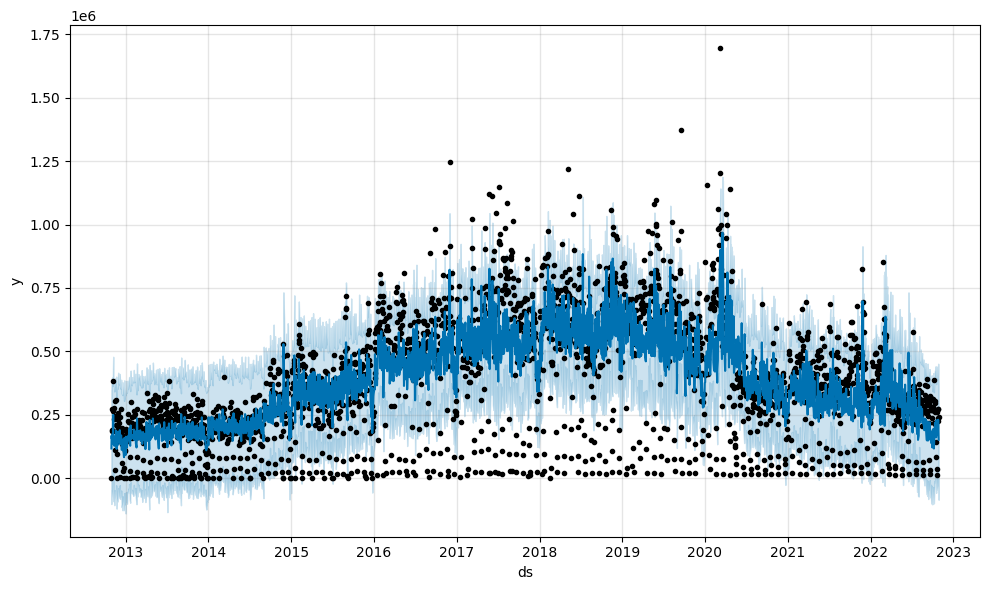

In [15]:
fig1 = model.plot(forecast);


***Can be predicted from the graph that the price for crude oil in 2023 can either increase above 0.25% or decrease below 0.25% . This prediction affetcs the prices of Crude Oil in 2024***
******

c:\python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].d

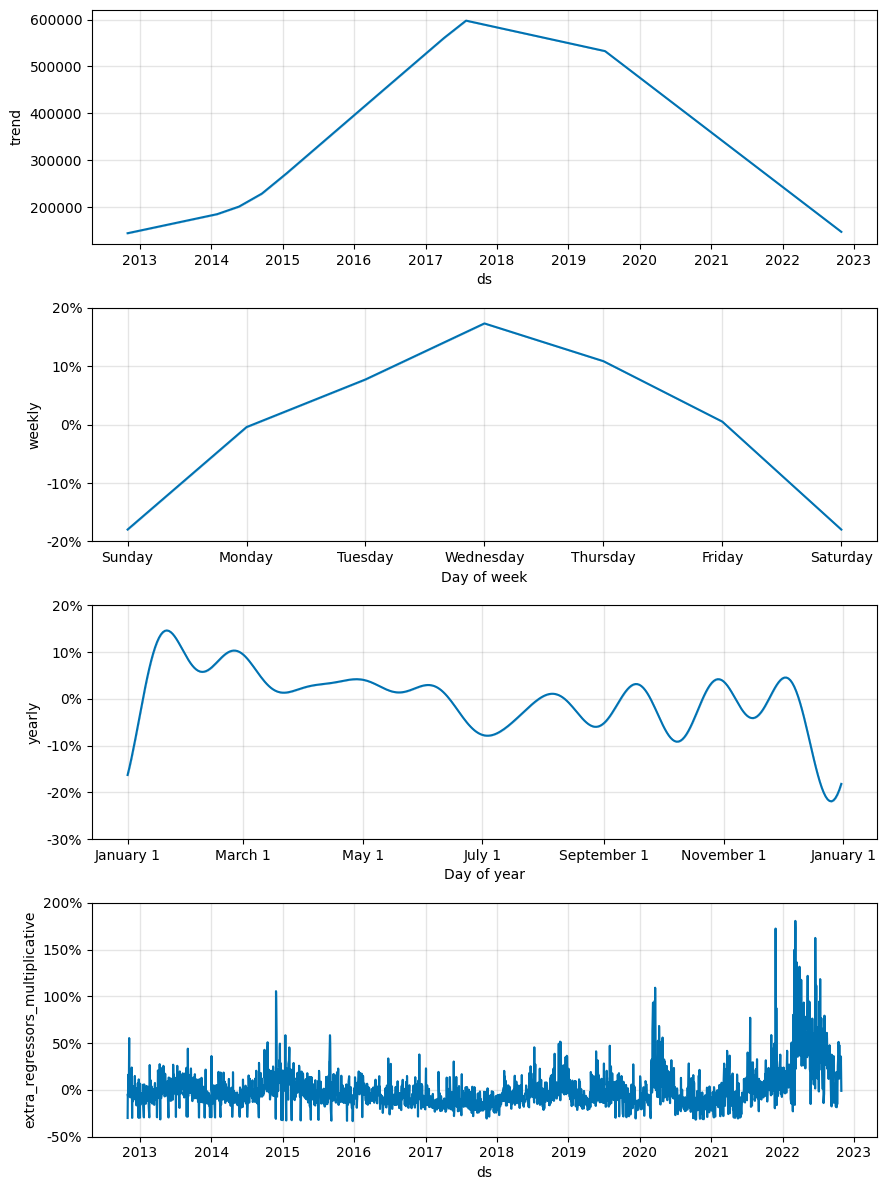

In [16]:
fig2 = model.plot_components(forecast);

***From the graph , satrting from the trend , it can be predicted that the price for crude oil in 2023 can either increase above 0.25% or decrease below 0.25% . This prediction affetcs the prices of Crude Oil in 2024***

***On the Weekly Basis , the price of Crude oil -20% from sunday to 20% on wednesday and then drops way down to -20% on saturday***

***On the Yearly Basis, the price for Crude oil in January increases above 10% while the following months are between the range of -10% to 10%,and decreases by -20% in the month of January at the beginning of the next year***

***With the Extra Regressors Multiplicative , the impact of the independent variables that is the Close/Last , Open , High , Low on the Dependent Variable y (Volume) on the yearly basis states that , the precentage of the prices for Crude Oil from 2012 to 2021 ranges from -50% to 100% , while the price for crude oil in 2022 increases to the range of %200 . And can be predicted that the price in 2023 and 2024 can be in the range of -50% to 50%***

***

# Cross Validation

In [17]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model ,
                         horizon = 365,
                         parallel = 'processes',
                         )

In [18]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-10-31,147998.198988,43843.993824,254033.628924,8295.0,2013-10-30 23:59:59.999999635
1,2013-11-01,104548.206769,-7048.758639,211987.721119,259377.0,2013-10-31 23:59:59.999999635
2,2013-11-04,87748.785694,-17938.475070,190970.245994,195251.0,2013-11-03 23:59:59.999999635
3,2013-11-05,107874.918358,3878.919591,223058.115904,201793.0,2013-11-04 23:59:59.999999635
4,2013-11-06,184938.821218,78692.115570,282249.852111,255167.0,2013-11-05 23:59:59.999999635


In [19]:
# Error Assessment

from sklearn.metrics import mean_absolute_error ,mean_squared_error
print( "Mean Absolute Error (MAE) : " , mean_absolute_error(df_cv['y'] , df_cv['yhat']))
print("Mean Squared Error (MSE) : " , np.sqrt( mean_squared_error(df_cv['y'] , df_cv['yhat'])))

Mean Absolute Error (MAE) :  131230.5917028121
Mean Squared Error (MSE) :  188139.3602708587


### Multilinear Regression

In [20]:
import statsmodels.api as sm 


In [21]:
crudeoil_analysis.head()

,ds,Close/Last,y,Open,High,Low
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63


In [22]:
#scatter plot to compare target variable(dependent variable) y-axis and independent variable(regressors) x-axis
# sns.set(font_scale = 2)
# sns.scatterplot(data = crudeoil_analysis ,
#                 y = ['y'],
#                 x = ['Close/Last' , 'High', 'Open' , 'Low'],
#                 height = 6)

In [23]:
crudeoil_analysis_correlation = crudeoil_analysis.drop  (columns = ["ds"] , axis = 1)
crudeoil_analysis_correlation.head()

,Close/Last,y,Open,High,Low
0,87.90,241417.0,88.67,88.76,87.08
1,88.26,273717.0,88.26,89.79,87.33
2,87.91,271474.0,85.07,88.41,84.14
3,85.32,226337.0,84.88,86.03,83.06
4,84.58,238458.0,85.24,85.92,82.63


<Axes: >

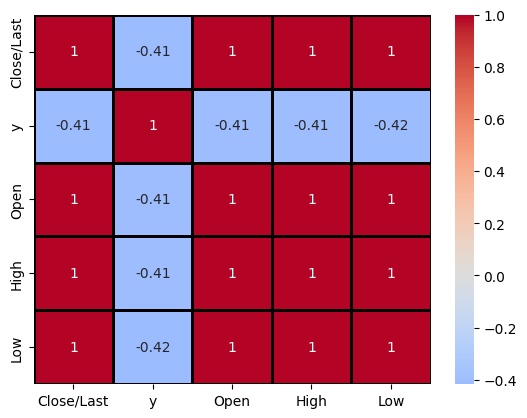

In [24]:
#correlation matrix
sns.heatmap(crudeoil_analysis_correlation.corr(),
            annot = True ,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor = 'black')

# Multilinear Regression Preparation

In [25]:
crudeoil_analysis.head()

,ds,Close/Last,y,Open,High,Low
0,2022-10-28,87.90,241417.0,88.67,88.76,87.08
1,2022-10-27,88.26,273717.0,88.26,89.79,87.33
2,2022-10-26,87.91,271474.0,85.07,88.41,84.14
3,2022-10-25,85.32,226337.0,84.88,86.03,83.06
4,2022-10-24,84.58,238458.0,85.24,85.92,82.63


In [26]:
# Isolate x and y
y = crudeoil_analysis['y']
x = crudeoil_analysis[['Close/Last' , 'Open' , 'High' , 'Low']]

In [27]:
#adding a constant 
x = sm.add_constant(x)
x.head()

,const,Close/Last,Open,High,Low
0,1.0,87.90,88.67,88.76,87.08
1,1.0,88.26,88.26,89.79,87.33
2,1.0,87.91,85.07,88.41,84.14
3,1.0,85.32,84.88,86.03,83.06
4,1.0,84.58,85.24,85.92,82.63


In [28]:
#Training and Testing Set
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y ,
                                                       test_size =0.2 ,
                                                       random_state = 1502)

x_train.head(2)

,const,Close/Last,Open,High,Low
523,1.0,38.72,39.90,40.47,37.61
1343,1.0,46.04,44.89,46.35,44.88


# Multilinear Regression

In [29]:
#Multilinear Regression
model = sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          9.21e-101
Time:                        11:40:11   Log-Likelihood:                -27893.
No. Observations:                2038   AIC:                         5.580e+04
Df Residuals:                    2033   BIC:                         5.582e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.365e+05   1.52e+04     41.812      0.0

Explaination of the Result  Concerning Fuel Prices

The coefficient 
The intercept (const) is 6.365e+05 which indicate that the const will be 6.365e+05 when all the independent variables is 0.

The Close/Last is -1.563e+04 which means when Close/Last decrease by 1 unit ,the y(Volume) is expected to decrease by -1.563e+04

The Open is 989.6420 which means when Open increase by 1 unit ,the y(Volume) is expected to increase by -1.563e+04

The High is 4.092e+04 which means when High increase by 1 unit ,the y(Volume) is expected to increase by 4.092e+04

The Low is -3.098e+04 which means when Low decrease by 1 unit ,the y(Volume) is expected to decrease by -3.098e+04



The R-Squared 

The Adjusted R-Squared is 20.5% ,which means 20.5% of the variability of y(Volume) can be explained by the independent variables. A higher R-squared value indicates a better fit of the model to the data.

 
The Confidence Interval

The confidence interval for Close/Last is between the range (-3.09e+04  -  -414.259)
The confidence interval for Open is between the range (-1.14e+04  -  1.34e+04)
The confidence interval for High is between the range (2.65e+04  -  5.53e+04)
The confidence interval for Low is between the range ( -4.51e+04 - -1.69e+04)
These intervals provide a range of values within which we are reasonably confident the true population parameter lies


Statistical Significance

The independence variables are statistically significant because there are less than the significant level that is 0.005.
Statistical significance indicates whether the independent variable has a significant effect on the dependent variable, holding other variables constant.
In this case . the High and Low variable are statistically significant while the Close/Last and Open variable are insignificant statistically . The High and Low variable have an effect on the y(Volume) determing the price at the end of the day.`

